In [22]:
# Sentiment Analysis on Twitter_Data.csv — Ready-to-Run Notebook


# 1. Install Required Libraries (run once)

# If running in Jupyter/Colab, uncomment:
# !pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud


# 2. Import Libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

print(stopwords.words('english')[:20])

# Download NLTK data (run once)
nltk.download('stopwords')
nltk.download('wordnet')


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# 3. Load Dataset

# Make sure Twitter_Data.csv is in the same folder

df = pd.read_csv("Twitter_Data.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (162980, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [24]:
# 4. Check Columns

print(df.columns)

# Usually dataset contains columns like: 'clean_text' and 'category'
# category: -1 = Negative, 0 = Neutral, 1 = Positive

# Rename for simplicity if needed
if 'clean_text' in df.columns:
    df = df.rename(columns={'clean_text': 'text'})
if 'category' in df.columns:
    df = df.rename(columns={'category': 'sentiment'})

# Remove missing values
df = df[['text', 'sentiment']].dropna()


Index(['clean_text', 'category'], dtype='object')


In [25]:
# 5. Text Preprocessing

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove special chars
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)


df['cleaned_text'] = df['text'].apply(clean_text)


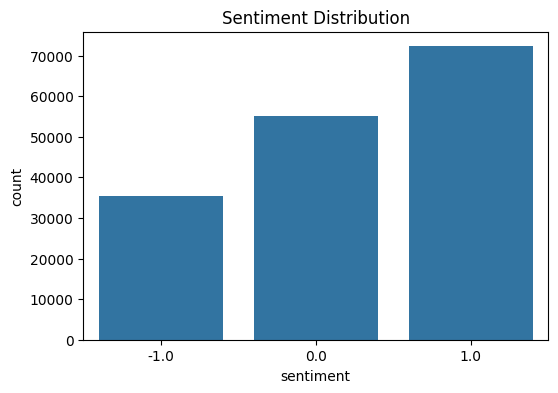

In [26]:
# 6. Data Visualization

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [27]:
# 7. Train-Test Split

X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 8. Convert Text to Numbers (TF-IDF)

vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [28]:
# ==============================
# 9. Train Model (Logistic Regression)
# ==============================
model = LogisticRegression()
model.fit(X_train_vec, y_train)


C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.8775541510707492

Classification Report:

              precision    recall  f1-score   support

        -1.0       0.86      0.75      0.80      7152
         0.0       0.85      0.96      0.90     11067
         1.0       0.91      0.88      0.89     14375

    accuracy                           0.88     32594
   macro avg       0.87      0.86      0.87     32594
weighted avg       0.88      0.88      0.88     32594



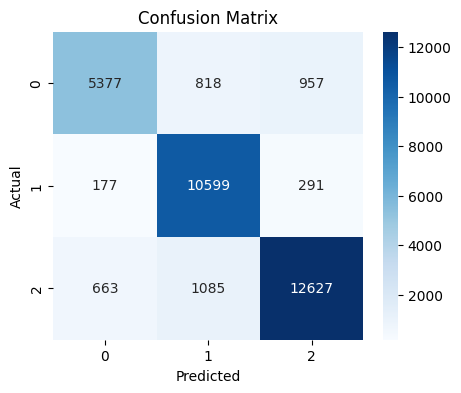

In [29]:
# 10. Model Evaluation

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
# 11. Test on Custom Tweet

def predict_sentiment(text):
    text = clean_text(text)
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return pred

print("Custom Prediction:")
print(predict_sentiment("I love this new phone!"))

# ==============================
# END — This notebook satisfies:
# ✔ Data preprocessing
# ✔ Model implementation
# ✔ Insights & evaluation
# ==============================

Custom Prediction:
1.0
